In [1]:
import sys
import os
sys.path.append("../")
from VersaQT.data_manip import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import statsmodels.api as sm
import plotly.graph_objects as go


In [2]:
corn = yf.download("ZC=F", start="2020-01-01", end="2023-12-31", interval="1d")
corn.columns = corn.columns.get_level_values(0)
corn

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,391.50,392.00,387.25,387.75,103987
2020-01-03,386.50,392.00,385.50,391.50,125931
2020-01-06,384.75,387.75,382.75,386.25,112130
2020-01-07,384.50,385.75,383.50,385.00,93541
2020-01-08,384.25,385.50,382.25,384.00,135523
...,...,...,...,...,...
2023-12-22,473.00,474.00,471.50,472.50,80484
2023-12-26,480.25,481.00,471.50,473.00,114198
2023-12-27,476.50,480.25,474.50,479.75,107950


In [3]:
corn["Close"]

Date
2020-01-02    391.50
2020-01-03    386.50
2020-01-06    384.75
2020-01-07    384.50
2020-01-08    384.25
               ...  
2023-12-22    473.00
2023-12-26    480.25
2023-12-27    476.50
2023-12-28    474.25
2023-12-29    471.25
Name: Close, Length: 1006, dtype: float64

In [4]:
FracDiff = FractionalDifferentitation()
FracDiff.fit(corn, "Close")
# FracDiff.OptimalFFD(t=1e-2)

Calculating optimal differentiation degree
Optimal d found as 0.3333333333333333


Text(0.5, 1.0, 'd=0.3')

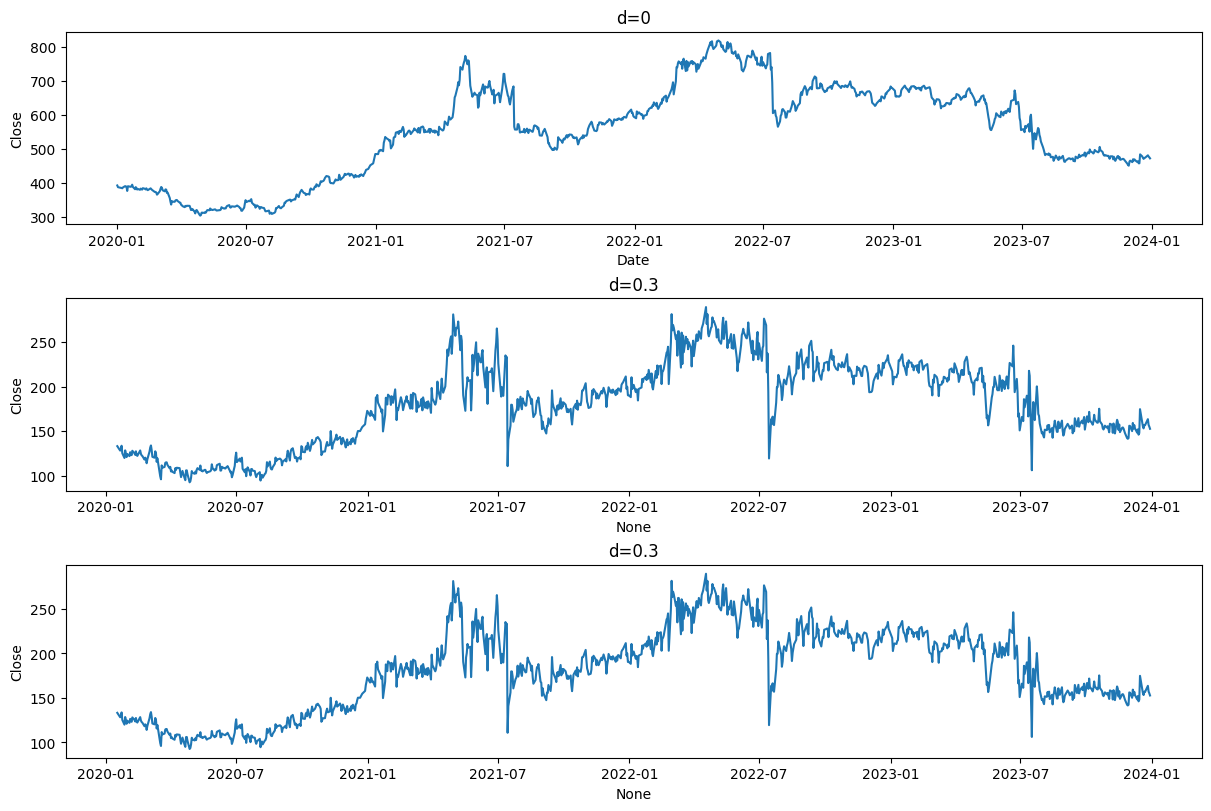

In [5]:
fig, axs = plt.subplots(3, 1, constrained_layout=True, figsize=(12, 8))

axs = axs.flatten()

# corn_frac = fracDiff_FFD(corn, 0, thres=0.01)
sns.lineplot(corn, x=corn.index, y="Close", ax=axs[0])
axs[0].set_title("d=0")

corn_frac = FracDiff.fracDiff_FFD(thres=0.01)
sns.lineplot(corn_frac, x=corn_frac.index, y="Close", ax=axs[1])
axs[1].set_title("d=0.3")

corn_frac = FracDiff.fracDiff_FFD(thres=0.01)
sns.lineplot(corn_frac, x=corn_frac.index, y="Close", ax=axs[2])
axs[2].set_title("d=0.3")

In [ ]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(12, 8))

axs = axs.flatten()

# corn_frac = fracDiff_FFD(corn, 0, thres=0.01)
sns.lineplot(corn, x=corn.index, y="Close", ax=axs[0])
axs[0].set_title("d=0")

corn_frac = fracDiff(corn, 0.3, thres=0.01)
sns.lineplot(corn_frac, x=corn_frac.index, y="Close", ax=axs[1])
axs[1].set_title("d=0.3")


corn_frac = fracDiff(corn, 0.5, thres=0.01)
sns.lineplot(corn_frac, x=corn_frac.index, y="Close", ax=axs[2])
axs[2].set_title("d=0.5")

corn_frac = fracDiff(corn, 1, thres=0.01)
sns.lineplot(corn_frac, x=corn_frac.index, y="Close", ax=axs[3])
axs[3].set_title("d=1")